1. 
    Two matrices of size: (n,k) and (k,m)

    n rows of first matrix multiplied by m columns of second matrix and there will be elementwise multiplication of these that is k times.  
    Multiplication: n * m * k

    For every row and column multiplication of k elements, there will be 1 less additions i.e., k-1.
    Addition: n * m * (k-1)

In [35]:
# 2. 


# without numpy

import time
# a = [[2,2], [1,1]]
# b = [[1,2,3], [2,3,4]]

a = [[2,2], [1,1], [2,2], [1,1], [2,2], [1,1]]
b = [[1,2,3,4,5,6,7,8,9], [2,3,4,5,6,7,8,9,10]]

start_time = time.time()
rows_a, cols_a = len(a), len(a[0])
rows_b, cols_b= len(b), len(b[0])
res = [[0 for _ in range(cols_b)] for _ in range(rows_a)]

if cols_a != rows_b:
    raise ValueError("Criteria does not satisfy")

for i in range(rows_a):
    for j in range(cols_b):
        for k in range(cols_a):
            res[i][j] += a[i][k] * b[k][j]

time = time.time() - start_time
# print(res)
print(f"time taken without numpy: {time}")


# with numpy
import numpy as np
import time
start_time_np = time.time()
a_np = np.array(a)
b_np = np.array(b)

res_np = np.matmul(a_np, b_np)
time_np = time.time() - start_time_np


# print(res_np)
print(f"time taken with numpy: {time_np}")

time taken without numpy: 0.0008256435394287109
time taken with numpy: 0.00038504600524902344


In [36]:
# 3. 

import numpy as np
import timeit

def find_median_two_pass(arr):
    highest = max(arr)
    
    arr.remove(highest)
    second_highest = max(arr)

    median = (highest + second_highest) / 2 if len(arr) % 2 == 0 else second_highest
    
    return median

#sorting can be used to improve the time complexity than the two-pass method
def find_median_sorting(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    return (sorted_arr[n // 2] + sorted_arr[(n - 1) // 2]) / 2 if n % 2 == 0 else sorted_arr[n // 2]


arr = np.random.rand(10).tolist()
print(arr)

time_two_pass = timeit.timeit(lambda: find_median_two_pass(arr.copy()), number=1)
time_sorting = timeit.timeit(lambda: find_median_sorting(arr.copy()), number=1)
time_numpy = timeit.timeit(lambda: np.median(arr), number=100)

print("Time taken by two-pass method:", time_two_pass)
print("Time taken by sorting method:", time_sorting)
print("Time taken by NumPy median routine:", time_numpy)


[0.4458352646537933, 0.4361345996859777, 0.5160909084680007, 0.9721092445680616, 0.6744950235041477, 0.28621916469344977, 0.9135746406528913, 0.9471239158350158, 0.25348700743180996, 0.28740147470249267]
Time taken by two-pass method: 9.316001523984596e-06
Time taken by sorting method: 1.1434000043664128e-05
Time taken by NumPy median routine: 0.007187605999206426


4.
    Gradient w.r.t x

    $$
    f(x) = x^2y + y^3sin(x)
    $$
    $$
    \frac {\partial f} {\partial x} = 2xy + y^3cos(x)
    $$

    Gradient w.r.t y

    $$
    f(x) = x^2y + y^3sin(x)
    $$
    $$
    \frac {\partial f} {\partial y} = x^2 + 3y^2sin(x)
    $$


In [37]:
# 5. 
import jax.numpy as jnp
import jax

def func(x, y):
    return (x**2 * y) + (y**3 *(jnp.sin(x)))

x_val=1.5
y_val=2.0

def analytical_grad(x,y):
    df_dx = (2*x*y) + (y**3 * (jnp.cos(x)))
    df_dy = (x**2) + (3* y**2 * (jnp.sin(x)))
    return df_dx, df_dy

gradient_fn = jax.grad(func, argnums=(0,1))
gradient_jax = gradient_fn(x_val,y_val)
grad_analytical = analytical_grad(x_val, y_val)

print(f"Gradient Values of function func w.r.t. x and y respectively for given values of x and y found using jax:{gradient_jax[0]}, {gradient_jax[1]}") 
print(f"Gradient Values of function f w.r.t. x and y respectively for given values of x and y, found anyaltically:{grad_analytical[0]}, {grad_analytical[1]}")

Gradient Values of function func w.r.t. x and y respectively for given values of x and y found using jax:6.565897464752197, 14.219940185546875
Gradient Values of function f w.r.t. x and y respectively for given values of x and y, found anyaltically:6.565897464752197, 14.219940185546875


In [38]:
# 6. 

# from sympy import diff, symbols, sin
import sympy

x,y = sympy.symbols('x y')
func = x**2*y + y**3 *(sympy.sin(x))

df_dx_sympy = sympy.diff(func, x)
df_dy_sympy = sympy.diff(func, y)

# x_val=1.5
# y_val=2.0

# def analytical_grad(x,y):
#     df_dx = (2*x*y) + (y**3 * (np.cos(x)))
#     df_dy = (x**2) + (3* y**2 * (np.sin(x)))
#     return df_dx, df_dy

# grad_analytical = analytical_grad(x_val, y_val)

print(f"Gradient Values of function f w.r.t. x and y respectively found using sympy: {df_dx_sympy, df_dy_sympy}")
# print(grad_analytical)

Gradient Values of function f w.r.t. x and y respectively found using sympy: (2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x))


In [39]:
# 7. 

year=['2022', '2023', '2024', '2025']
default = {'Branch1': {'RollNumber': 'RN1', 
                                      'Name': 'Name1', 
                                      'Marks':{'Maths': 100, 'English': 10}
                                      }}

student_record = dict.fromkeys(year, default)

# student_record['2022'] = {'Branch1': {'RollNumber': 'RN1', 
#                                       'Name': 'Name1', 
#                                       'Marks':{'Maths': 100, 'English': 10}
#                                       }, 
#                           'Branch2':{}
#                           }

# student_record['2023'] = {'Branch1': {'RollNumber': 'RN3', 
#                                       'Name': 'Name3', 
#                                       'Marks':{'Maths': 0, 'English': 100}
#                                       }, 
#                           'Branch2':''
#                           }

# student_record['2024'] = {'Branch1': '',
#                           'Branch2': ''}
student_record

{'2022': {'Branch1': {'RollNumber': 'RN1',
   'Name': 'Name1',
   'Marks': {'Maths': 100, 'English': 10}}},
 '2023': {'Branch1': {'RollNumber': 'RN1',
   'Name': 'Name1',
   'Marks': {'Maths': 100, 'English': 10}}},
 '2024': {'Branch1': {'RollNumber': 'RN1',
   'Name': 'Name1',
   'Marks': {'Maths': 100, 'English': 10}}},
 '2025': {'Branch1': {'RollNumber': 'RN1',
   'Name': 'Name1',
   'Marks': {'Maths': 100, 'English': 10}}}}

In [40]:
# 8. 

class A(object):  
    def __init__(self):  
        self.branch1=1  
        self.branch2=2  

obj=A()  
print(obj.__dict__)

{'branch1': 1, 'branch2': 2}


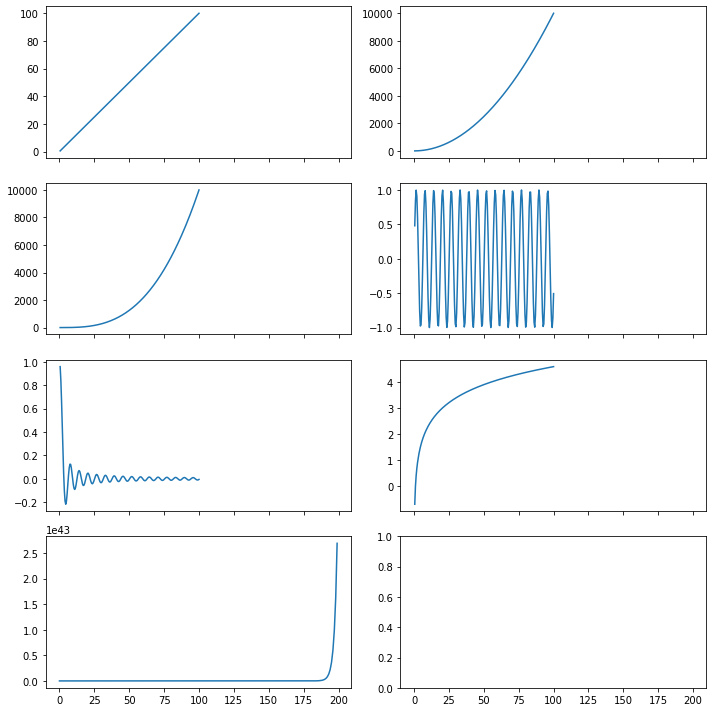

In [41]:
# 9. 

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(4,2, figsize=(10,10), sharex =True)
x = np.arange(0.5, 100.1, 0.5)
# print(x)
# y=x
y=[[x, x**2], 
   [x**3 /100, np.sin(x)],
   [np.sin(x)/x, np.log(x)]
   ]
   
# print(ax[2,1], y[3][1])

for i in range(ax.shape[0]-1):
    for j in range(ax.shape[1]):
        # print(i, j)
        ax[i][j].plot(x, y[i][j], label='')

ax[3,0].plot(np.exp(x))

plt.tight_layout()
plt.show()

In [42]:
# 10. 

import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, size=[20,5])
matrix_df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])
print(f"Column: {matrix_df.std().idxmax()}, Std.: {matrix_df.std().max(): .5f}")
print(f"Row: {matrix_df.mean(axis=1).idxmin()}, Mean:{matrix_df.mean(axis=1).min(): .5f}")

Column: b, Std.:  0.34137
Row: 4, Mean: 1.22194


In [43]:
# 11. 

f_sum = matrix_df['a'] + matrix_df['b'] + matrix_df['c'] + matrix_df['d'] + matrix_df['e']
# matrix_df.insert(5, "f", f_sum)
matrix_df['f'] = f_sum
matrix_df['g'] = matrix_df['f'].apply(lambda x: 'LT8' if x<8 else 'GT8')
lt8_rows = (matrix_df['g']=='LT8').sum()
lt8_std = matrix_df.loc[matrix_df['g']=='LT8', 'f'].std()
gt8_std = matrix_df.loc[matrix_df['g']=='GT8', 'f'].std()

print(f"NUmber of rows with value in f less than 8: {lt8_rows}")
print(f"std of lt8: {lt8_std}")
print(f"std of gt8: {gt8_std}")

NUmber of rows with value in f less than 8: 15
std of lt8: 0.5366624228308395
std of gt8: 0.3748045200138985


In [44]:
# 12. 

import numpy as np

arr_a = np.array([[1,2],
                  [3,4],
                  [5,6]])
# arr_b = np.array([10,10,10])
arr_b = np.array([10,10])

print(arr_a + arr_b)
print(f"Here array b is broadcast to match the dimension of array a, resulting in element-wise multplication for each row.")
# np.reshape(arr_a, (2,3)), np.reshape(arr_a, (2,3))*arr_b


[[11 12]
 [13 14]
 [15 16]]
Here array b is broadcast to match the dimension of array a, resulting in element-wise multplication for each row.


In [48]:
# 13. for 1-d array only

array = np.array([7,8,2,6,5,10,15,0,13])
# ele = np.min(array)
# index = np.where(array == ele)

# print(index[0])

def custom_argmin(arr):
    min_value = arr[0]
    min_index = 0

    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i

    return min_index

print(f"Min element's index without using argmin: {custom_argmin(array)}")
print(f"Min element's index using argmin: {np.argmin(array)}")

Min element's index without using argmin: 7
Min element's index using argmin: 7
